# Geodesics around Kerr Naked Singularity 

First, we import the necessary modules.

In [1]:
! pip3 install -U -q jaxlib jax

In [2]:
! pip3 install git+https://github.com/adxsrc/xaj.git

  Cloning https://github.com/adxsrc/xaj.git to /tmp/pip-req-build-eyc_k4vi
  Running command git clone -q https://github.com/adxsrc/xaj.git /tmp/pip-req-build-eyc_k4vi


In [3]:
! pip3 install git+https://github.com/adxsrc/fadge.git
! pip3 install git+https://github.com/adxsrc/pray.git

  Cloning https://github.com/adxsrc/fadge.git to /tmp/pip-req-build-z4b76hkd
  Running command git clone -q https://github.com/adxsrc/fadge.git /tmp/pip-req-build-z4b76hkd
  Cloning https://github.com/adxsrc/pray.git to /tmp/pip-req-build-p_p3aiw7
  Running command git clone -q https://github.com/adxsrc/pray.git /tmp/pip-req-build-p_p3aiw7


In [4]:
%load_ext autoreload
%autoreload 2

from jax.config import config
config.update("jax_enable_x64", True)

from pray      import PRay
from fadge.viz import KSHorizons as Horizons
from fadge.metric import KerrSchild as CartesianKS
from fadge.metric import Minkowski
from jax       import numpy as np

from matplotlib import pyplot as plt
from itertools  import product

import jax

We then instasize `PRay` into an object

In [5]:
pray = PRay(aspin=1.1, atol=1e-3, rtol=0, names={'ind':'lambda'})

There is no event horizon


To setup the initial conditions, we first set the camera location, and then specify the image.

Experiment 1: Grid from x, y = -9.75 to x, y = 9.75

In [6]:
pray.set_cam(1e4, 90, 0)
pray.set_image(20, 50)

print('Array shape of the initial conditions:', pray._ic.shape)

/usr/local/lib/python3.7/dist-packages/jax/experimental/maps.py:491: UserWarning: xmap is an experimental feature and probably has bugs!
  warn("xmap is an experimental feature and probably has bugs!")


Array shape of the initial conditions: (2, 4, 50, 50)


To perform geodesic integration, simply call `pray.geode()`.
When no argument is specified, the integration is carried out to `-2 * r_obs`.
The return values are the full steps during the integration.

In [7]:
l, f = pray.geode() # full step output

fx = f[:,0,1]
fy = f[:,0,2]
fz = f[:,0,3]

/usr/local/lib/python3.7/dist-packages/jax/experimental/maps.py:491: UserWarning: xmap is an experimental feature and probably has bugs!
  warn("xmap is an experimental feature and probably has bugs!")


jit(masked_do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[2,4,50,50])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float32[2,4,50,50])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,50,50])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,50,50])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,50,50])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,50,50])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,50,50])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,50,50])>with<DynamicJaxprTrace(level=0/1)>]


 50%|█████     | 50/100 [05:05<08:46, 10.52s/it, lambda=-1.00e+04, dlambda=-0.0103  ]


Integration unfinished, try increasing allowed number of steps N=10000


 50%|█████     | 50/100 [04:55<?, ?it/s, lambda=-1.01e+04, dlambda=-0.00346 ]


Integration unfinished, try increasing allowed number of steps N=10000


Because `PRay` uses `XAJ` for solving ODEs, it supports dense output.
We can put a lot of sampling points near the black hole for better visualization of the geodeiscs.

We are finally ready to plot the results.

In [8]:
def plot_fix_y(i, j0, j1, x, y, z, size, a, un_orbit):
  from fadge.viz import KSHorizons as Horizons
  horizons = Horizons(1.1)

  fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
  fig.tight_layout()
  for ax in [a for ax in axes for a in ax]:
      ax.set_xlim(-size,size)
      ax.set_ylim(-size,size)
      ax.set_aspect('equal')

  ax = axes[0][0]
  horizons(ax, color='k')
  ax.set_xlabel('x')
  ax.set_ylabel('z')

  ax = axes[0][1]
  horizons(ax, color='k')
  ax.set_xlabel('y')
  ax.set_ylabel('z')

  ax = axes[1][0]
  horizons(ax, color='k', faceon=True)
  ax.set_xlabel('x')
  ax.set_ylabel('y')

  for j in range(j0,j1):
      axes[0][0].plot(x[:,i,j], z[:,i,j], '-o', color=f'C{j//4}')
      axes[0][1].plot(y[:,i,j], z[:,i,j], '-o', color=f'C{j//4}')
      axes[1][0].plot(x[:,i,j], y[:,i,j], '-o', color=f'C{j//4}')

  if un_orbit:
    radius = unstable_orbit(a)

    theta = np.linspace( 0 , 2 * np.pi , 150 )
    
    xx = radius * np.cos(theta)
    yy = radius * np.sin(theta)
    
    ax = axes[0][0]
    ax.plot(xx,yy)

def unstable_orbit(a):
  ang = (np.arccosh(a))/3
  radius = 4*(np.cosh(ang))**2 # unstable circular photon orbit radius
  return(radius)


In [9]:
def plot_fix_z(j, i0, i1, x, y, z, size, a, un_orbit):
  from fadge.viz import KSHorizons as Horizons
  horizons = Horizons(1.1)

  fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
  fig.tight_layout()
  for ax in [a for ax in axes for a in ax]:
      ax.set_xlim(-size,size)
      ax.set_ylim(-size,size)
      ax.set_aspect('equal')

  ax = axes[0][0]
  horizons(ax, color='k')
  ax.set_xlabel('x')
  ax.set_ylabel('z')

  ax = axes[0][1]
  horizons(ax, color='k')
  ax.set_xlabel('y')
  ax.set_ylabel('z')

  ax = axes[1][0]
  horizons(ax, color='k', faceon=True)
  ax.set_xlabel('x')
  ax.set_ylabel('y')

  for i in range(i0,i1):
      axes[0][0].plot(x[:,i,j], z[:,i,j], '-o', color=f'C{i//4}')
      axes[0][1].plot(y[:,i,j], z[:,i,j], '-o', color=f'C{i//4}')
      axes[1][0].plot(x[:,i,j], y[:,i,j], '-o', color=f'C{i//4}')

  if un_orbit:
    radius = unstable_orbit(a)

    theta = np.linspace( 0 , 2 * np.pi , 150 )
    
    xx = radius * np.cos(theta)
    yy = radius * np.sin(theta)
    
    ax.plot(xx,yy)

def unstable_orbit(a):
  ang = (np.arccosh(a))/3
  radius = 4*(np.cosh(ang))**2 # unstable circular photon orbit radius
  return(radius)


### SELECTED PLOTS:

Look at all prograde orbits with initial z = 0.25. Note that all prograde orbits are unbounded.

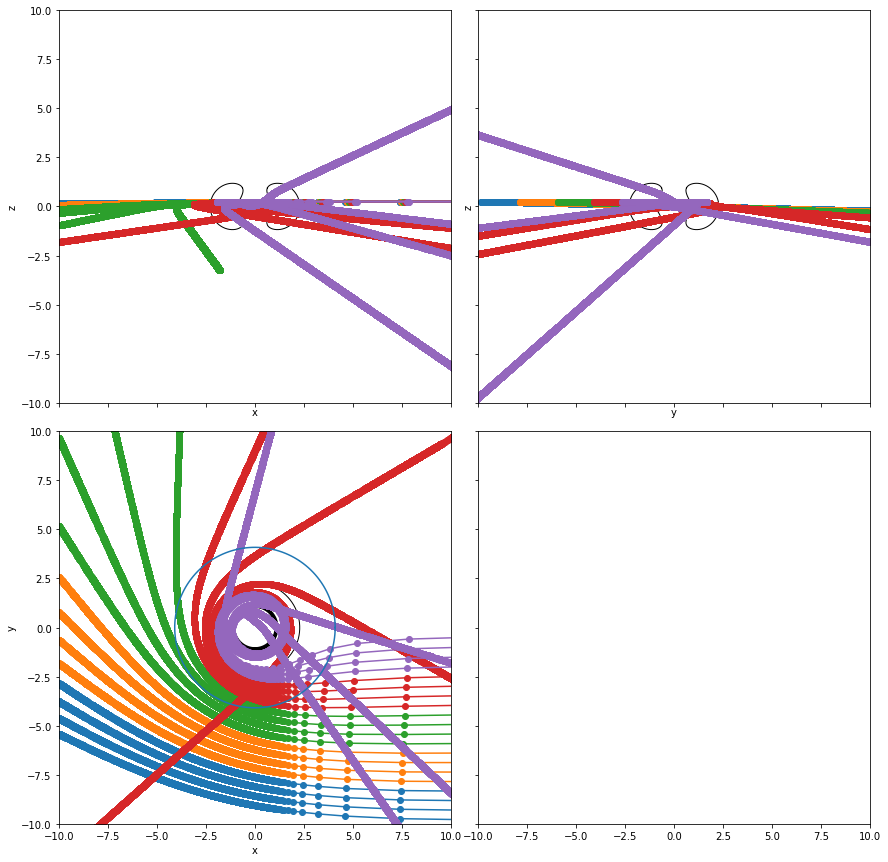

In [ ]:
plot_fix_z(20, 0, 20, fx, fy, fz, 10, 1.1, True)

Zooming in some prograde orbits nearer to the singularity

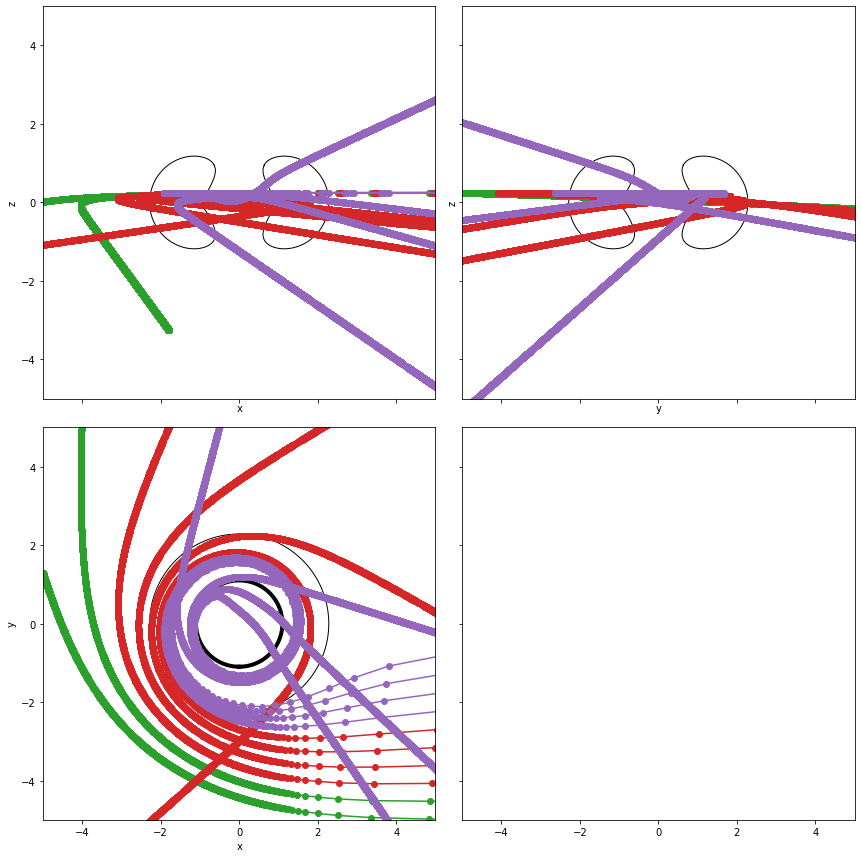

In [ ]:
plot_fix_z(20, 10, 20, 5)

Look at the retrograde orbits with initial z = 0.25. Note that there is a division between bounded and unbounded orbit.

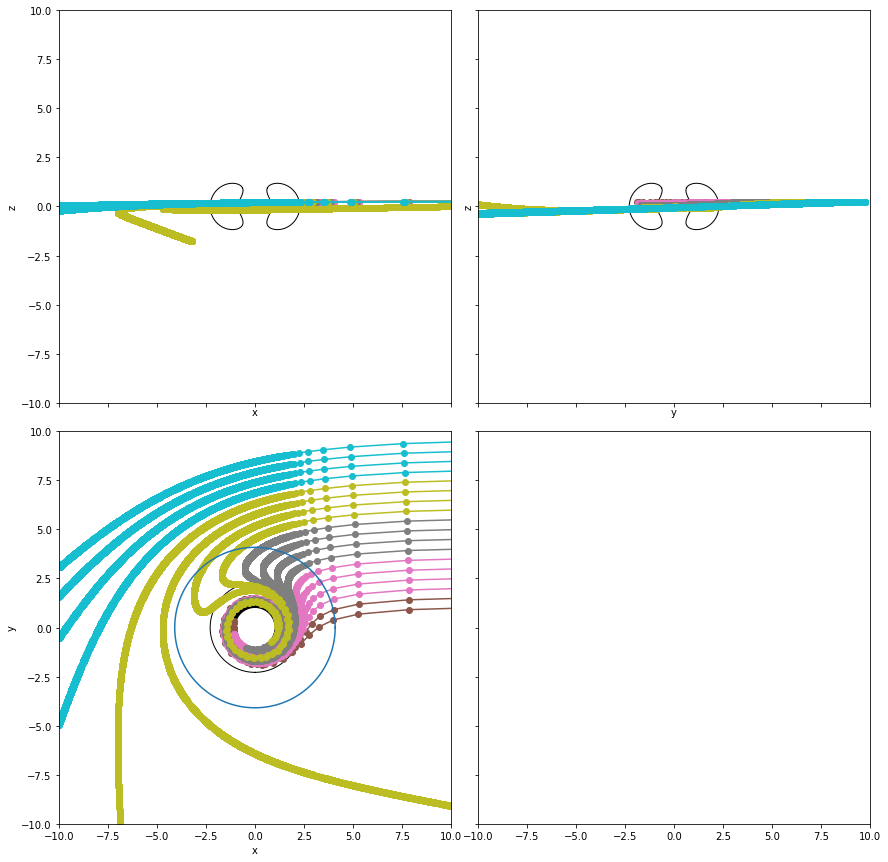

In [ ]:
plot_fix_z(20, 22, 40, 10, 1.1, True)

Look at the prograde orbits with initial z = 2.5.

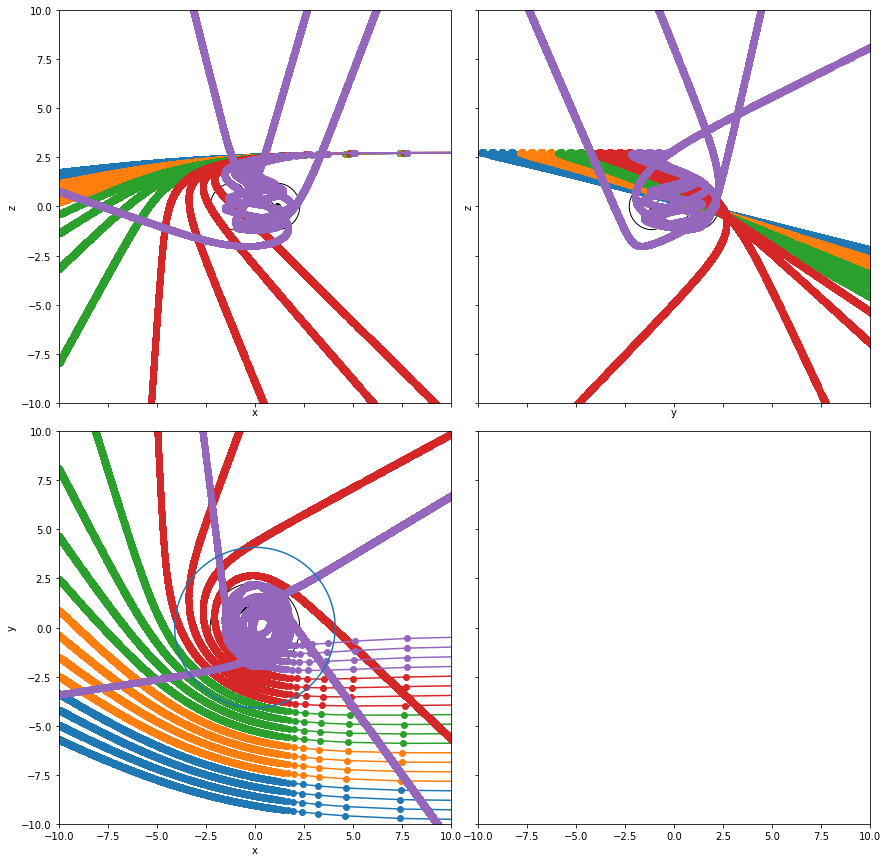

In [ ]:
plot_fix_z(25, 0, 20, fx, fy, fz, 10, 1.1, True)

Here is a selected retrograde orbit with initial x = 2.5 that is close to the naked singularity. The orbit oscillates between the ergosphere a few times.

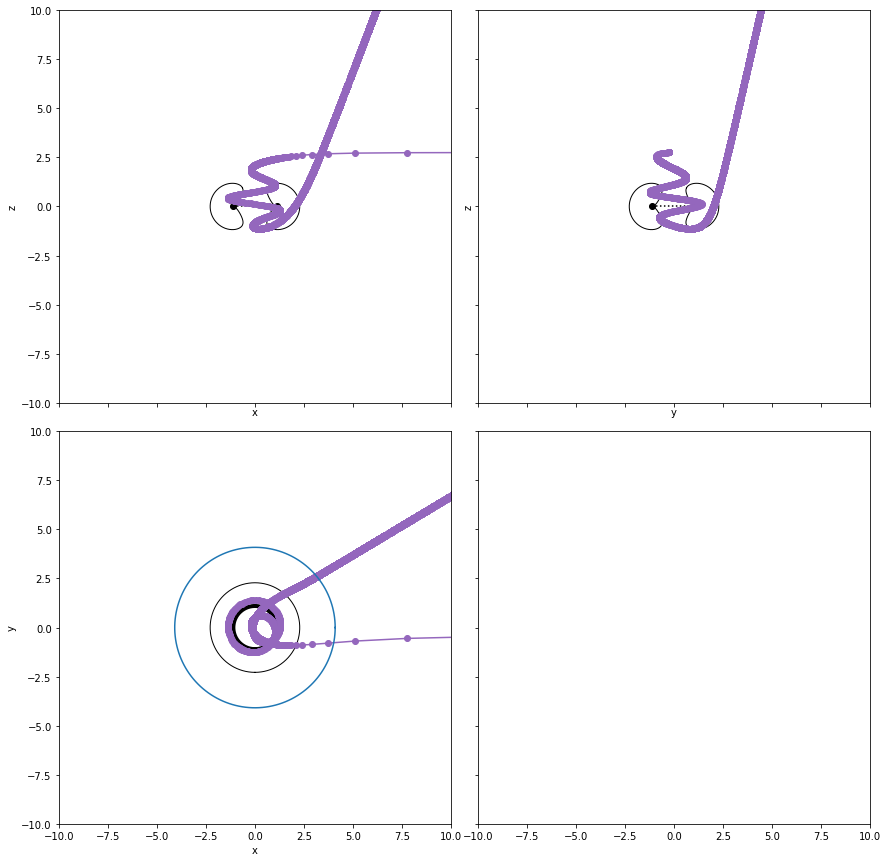

In [ ]:
plot_fix_z(25, 19, 20, fx, fy, fz, 10, 1.1, True)

Here is two selected retrograde orbits that are divided by the unstable spherical region with initial z = 2.5

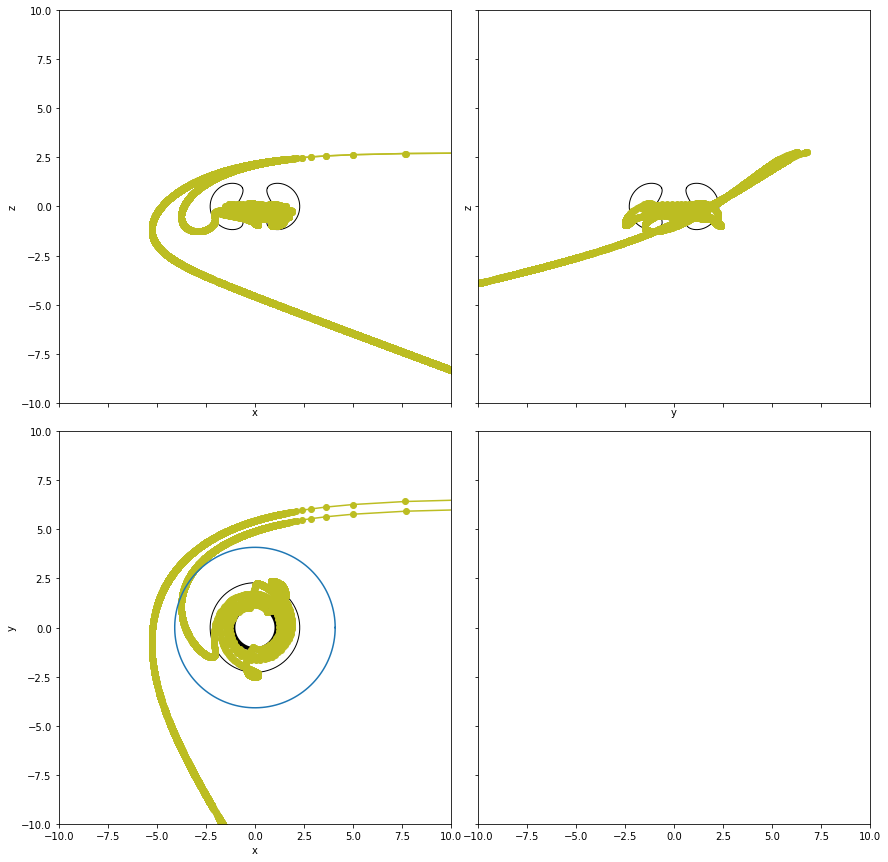

In [ ]:
plot_fix_z(25, 32, 34, fx, fy, fz, 10, 1.1, True)

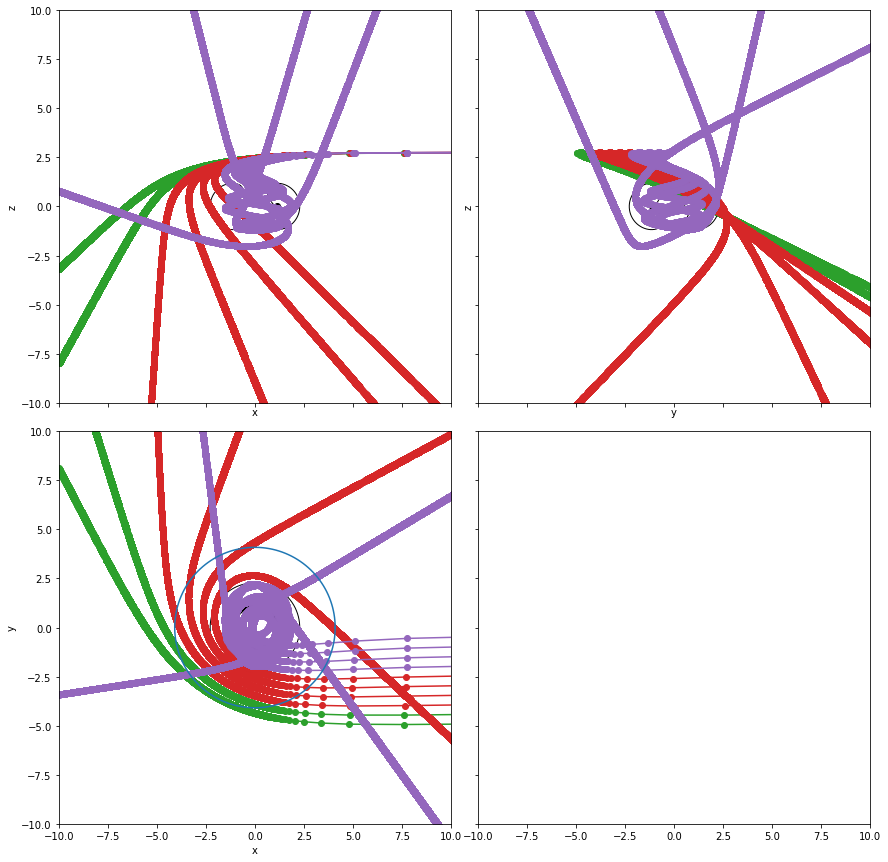

In [ ]:
plot_fix_z(25, 10, 20, fx, fy, fz, 10, 1.1, True)

Below are prograde orbits with initial z = -2.5. They give very similar results with the above prograde orbits with initial z = 2.5. The slight differences are perhaps because of the rounding errors of the initial z values as setup by the camera grid. There is a symmetry with the xy plane

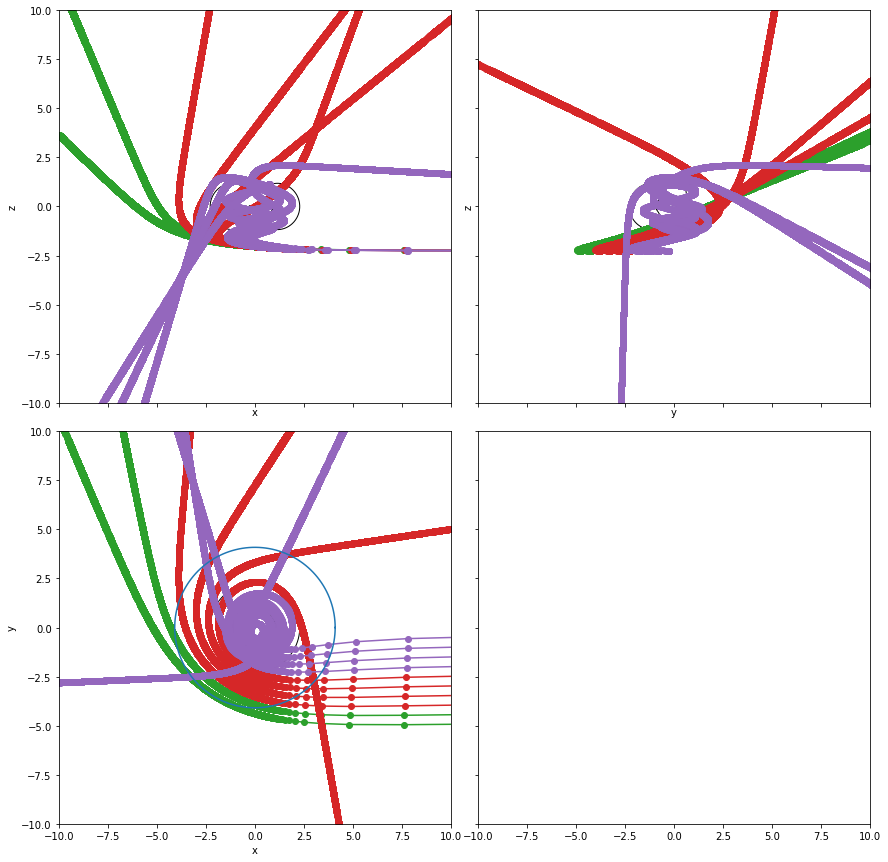

In [ ]:
plot_fix_z(15, 10, 20, fx, fy, fz, 10, 1.1, True)

There seems to be very bizarre "loops" when certain photons enter the ergosphere. This may be a numerical error because the numerical algorithm becomes very sensitive in turbulent regions. We can check this by confirming if p^(alpha) p_alpha = 0 and conserved quantities (energy, angular momentum, Carter's constant) are the same along the geodesics. We can also compare the data with the effective potential of the photons as a function of the conserved quantities. 

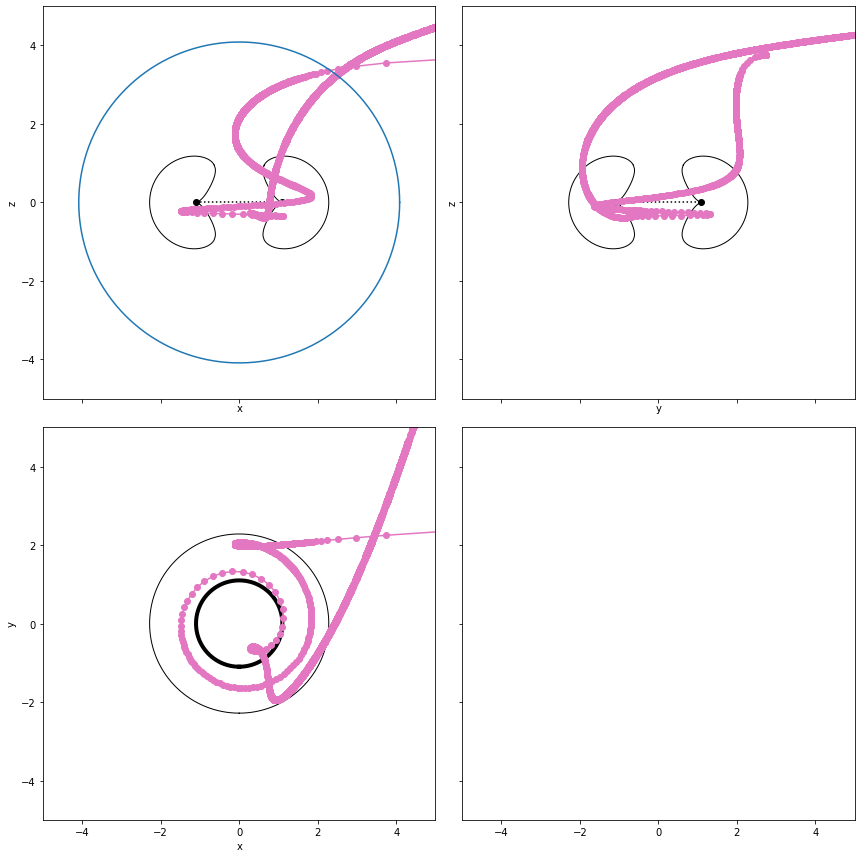

In [ ]:
plot_fix_y(25, 27, 28, fx, fy, fz, 5, 1.1, True)

The following program computes the black hole shadow:

In [10]:
from cmath import cos, acos
from math  import sqrt

def _cos23acos(x):
    y = cos(2 * acos(x) / 3)
    if y.imag != 0:
        #print(f'WARNING: cos23acos({x}) == ${y}')
        return np.nan
    else:
        return y.real

def cos23acos(X):
    try:
        return np.array([_cos23acos(x) for x in np.array(X)])
    except TypeError:
        return _cos23acos(X)

def PHI(a, r):
    if a == 0 and r == 3:
        return 0 # 2 * a + (9/2) * (r-3) / a
    elif a == 1:
        return - (r * r - 2 * r - 1)
    else:
        return - (r * r * r - 3 * r * r + a * a * r + a * a) / (a * (r - 1))

def Q(a, r):
    if a == 0 and r == 3:
        return 27 # (r**3 / (r-1)**2) * (4 - r * (r-3)**2 / a**2)
    if a == 1:
        return - r*r*r * (r - 4)
    else:
        return - (r*r*r * (r*r*r - 6*r*r + 9*r - 4*a*a)) / (a*a * (r - 1) * (r - 1))

def shadow(aspin=1.1, inc=np.pi/2):
    if abs(aspin) <= 1:
        r1 = rph1(aspin)
    else:
        r1 = 1
    rs = np.linspace(r1, rph2(aspin), num=100)

    a = np.array([PHI(aspin, r) for r in rs]) / np.sin(inc)
    b = np.array([np.sqrt(Q(aspin, r) + (aspin * np.cos(inc))**2 - (PHI(aspin, r) / np.tan(inc))**2) for r in rs])
    
    return (
        -np.concatenate([-a, -a[::-1], -a[:1]]),
        -np.concatenate([ b, -b[::-1],  b[:1]]),
    )

Z1 = lambda a: 1 + np.cbrt(1 - a*a) * (np.cbrt(1 + a) + np.cbrt(1 - a))
Z2 = lambda a: np.sqrt(3 * a * a + Z1(a) * Z1(a))

reh1 = lambda a: 1 - np.sqrt(1 - a * a)
reh2 = lambda a: 1 + np.sqrt(1 - a * a)
rph1 = lambda a: 2 * (1 + cos23acos(-abs(a)))
rph2 = lambda a: 2 * (1 + cos23acos( abs(a)))
rmb1 = lambda a: 2 - abs(a) + 2 * np.sqrt(1 - abs(a))
rmb2 = lambda a: 2 + abs(a) + 2 * np.sqrt(1 + abs(a))
rms1 = lambda a: 3 + Z2(a) - np.sqrt((3 - Z1(a)) * (3 + Z1(a) + 2 * Z2(a)))
rms2 = lambda a: 3 + Z2(a) + np.sqrt((3 - Z1(a)) * (3 + Z1(a) + 2 * Z2(a)))

The following program computes the deflection angle and plot an alpha-beta visualization based on the deflection angle:

In [11]:
def deflection_angle(f):

  size1 = np.size(f[0,0,0,:,0])
  size2 = np.size(f[0,0,0,0,:])                    
  theta = np.empty((size1, size2))

  for i, j in product(range(size1), range(size2)):
    vf = f[:,1,1:3,i,j][0] # final velocity vector
    vi = f[:,1,1:3,i,j][-1] # initial velocity vector
    dp = np.dot(vf, vi)
    normvf = np.linalg.norm(vf) # final speed
    normvi = np.linalg.norm(vi) # initial speed
    angle = np.arccos(dp/(normvf*normvi)) # (vi dot vf) / (|vi| |vf|) = arccos(theta)

    theta = theta.at[(i,j)].set(angle)

  return theta

def theta_plot(f, theta):

  size1 = np.size(f[0,0,0,:,0])
  size2 = np.size(f[0,0,0,0,:])     

  alpha = np.array([])         
  beta = np.array([])   
  angle = np.array([])         

  for i, j in product(range(size1), range(size2)):
    
    alpha_ = -f[:, 0, 2, i, j][-1]
    beta_ = +f[:, 0, 3, i, j][-1]
    theta_ = theta[i, j]

    if np.isnan(theta_):
      theta_ = 0

    alpha = np.append(alpha, alpha_)
    beta = np.append(beta, beta_)
    angle = np.append(angle, theta_)
  
  fig, ax = plt.subplots(1,1,figsize=(16,16))
  plot_area = (16*72)**2 # in points
  size = (plot_area)/(size1*size2)

  plt.plot(*shadow(a), 'orange', linewidth=7) 

  ax.set_xlim(-10, 10)
  ax.set_ylim(-10, 10)
  plt.scatter(alpha, beta, c = angle, marker = "s", s = size, cmap = "seismic")
  ax.set_xlabel("alpha")
  ax.set_ylabel("beta")

### DEFLECTION ANGLE VISUALIZATION

Based on the deflection angle, let's plot an alpha-beta visualization of the naked singularity spinning at a = 1.1 viewed from a 10M x 10M grid at inclination angle theta = 90o and azimuthal angle phi = 0o (from +x axis). 

The deflection angle scales from 0 deg (black) to 90 deg (white) to 180 deg (red).

Inside the photon ring, Blue indicates "lens" region where light goes through the naked singularity (for inside the photon ring). Red indicates "mirror" regions where light is reflected back to the camera. 

Black indicates regions where retrograde orbits fall within the unstable spherical photon orbit and cannot escape from the singularity.

Outside the photon ring, blue indicates regions of deflected hyperbolic orbits.

White indicates regions of perpendicular deflected orbits.

The red "photon ring" corresponds well with the calculation of the shadow.

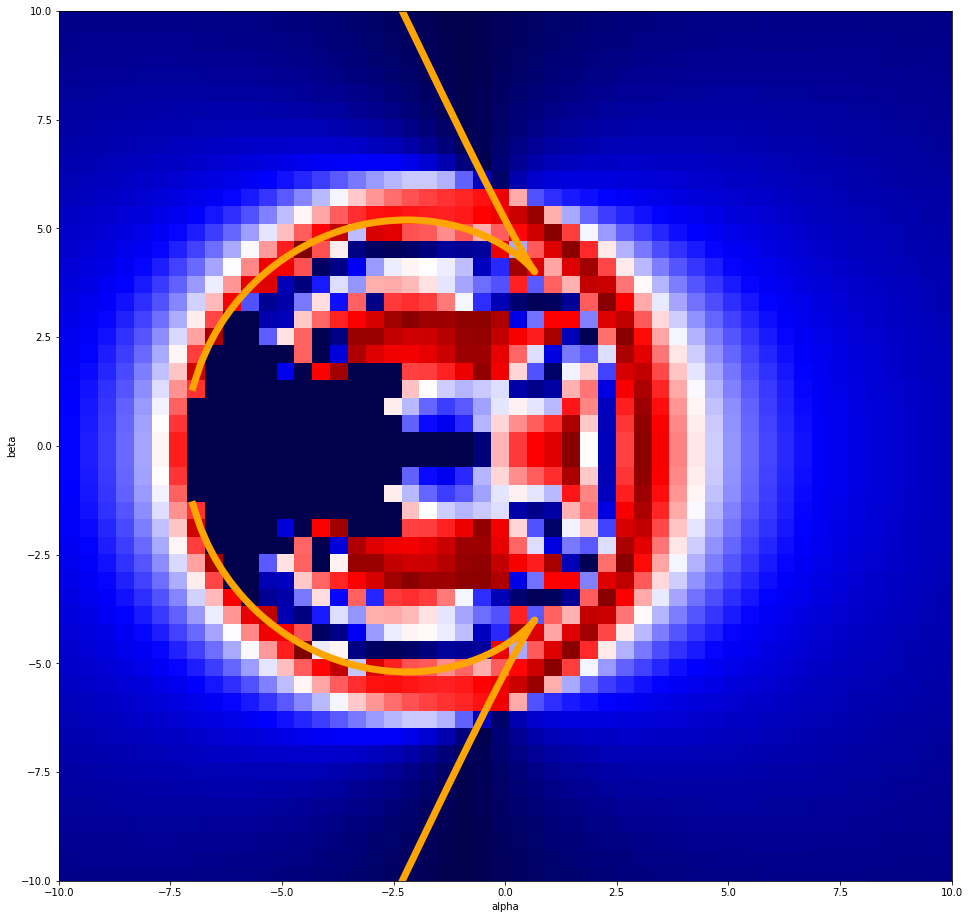

In [21]:
a = 1.1
theta = deflection_angle(f)
theta_plot(f, theta)

### CONSERVED p^(alpha) p_alpha check:

Here, we look at one trajectory that cannot get out of the naked singularity:

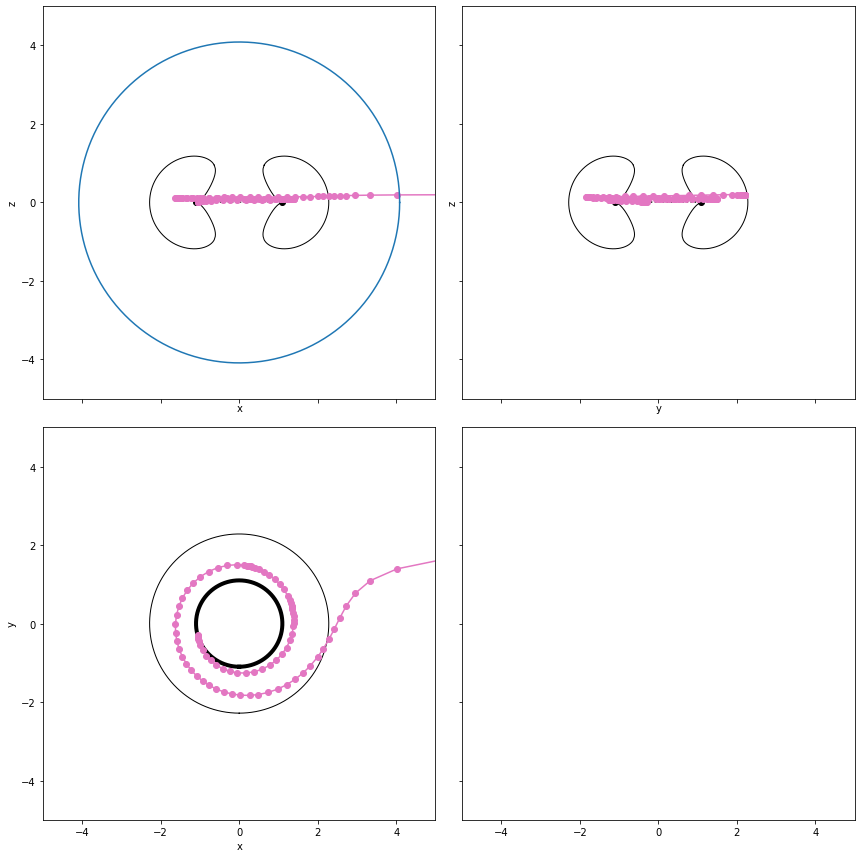

In [20]:
plot_fix_y(30, 25, 26, fx[-101:], fy[-101:], fz[-101:], 5, 1.1, True)

We use vmap from JAX to vectorize the (Cartesian Kerr-Schild) metrization of all position vectors alogn the trajectories. We can find values of p^alpha p_alpha (kk) along the diagonals of p^alpha dot vectorized metric dot transposed p^alpha. When the photon is far from the singularity, kk is close to 0 as expected for a null geodesics. However, when the photon gets closer to the singularity, kk grows larger, indicating numerical instability.

In [42]:
a = 1.1
xx = f[:,0,:,30,25][-101:] 
pp = f[:,1,:,30,25][-101:]
metric = CartesianKS()
metric_jax = jax.vmap(metric)
metric_array = metric_jax(xx)
kk = pp[:] @ metric_array[:,:] @ pp[:].T

for i in range(101):
  print(kk[i, i, i])

3007.101953912585
4705.014173026244
5593.797842446475
5868.074008248883
5828.023951834044
5688.611202402003
5627.629353587263
5689.015543588735
5829.469639976223
6019.876044938527
6243.461164058657
6483.686962472872
6733.939112691003
6978.79729303094
7218.1366905162195
7434.378915880853
7634.038722148666
7796.037333425937
7936.280294403133
8031.388870660028
8105.607910167203
8138.640830891847
8157.092651845317
8156.142232899114
8149.727020324668
8136.60013154562
8122.963573965757
8096.212150104252
8082.3121616364815
8065.706431819982
8041.654033079215
8005.707118818109
7946.22171482572
7839.75646793274
7714.4996863768465
7577.065657760618
7427.744898960672
7281.896767478196
7138.328342187814
7014.149243491634
6920.591881288912
6878.289550977646
6835.6007289376375
6761.899767733324
6660.130181479711
6453.148579639362
6133.04597424693
5791.147464899034
5443.296559603739
5094.661872546834
4748.497888680056
4408.877403717921
4077.5349751689196
3757.6014958790324
3448.9149534926023
3155.344

Let's look at a photon trajectory that can escape out of the naked singularity.

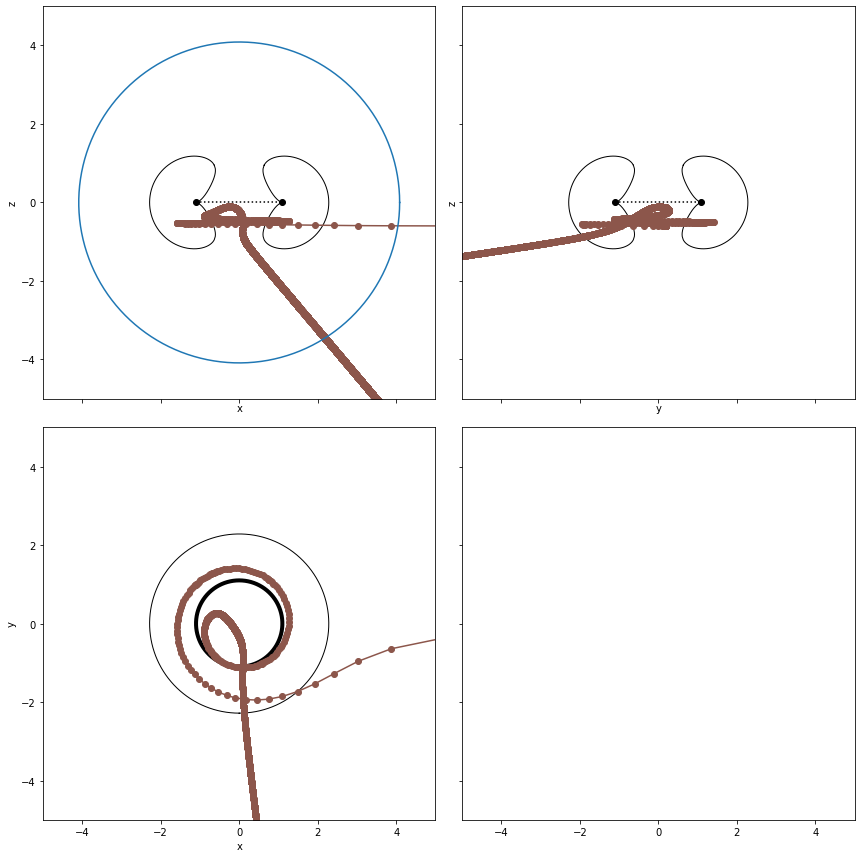

In [34]:
plot_fix_y(25, 23, 24, fx, fy, fz, 5, 1.1, True)

kk grows very large as soon as the photon approaches the singularity:

In [56]:
a = 1.1
xx = f[:,0,:,25,25][-100:] 
pp = f[:,1,:,25,25][-100:]
metric = CartesianKS()
metric_jax = jax.vmap(metric)
metric_array = metric_jax(xx)
kk = pp[:] @ metric_array[:,:] @ pp[:].T

for i in range(100):
  print(kk[i, i, i])

1879.89503805926
1884.94406756001
1891.829736092567
1901.7016518637463
1917.2670936426896
1938.1646710017314
1958.2795391338263
1977.1561254866344
1994.2091891806863
2009.2287958532947
2021.7527435150896
2031.7980483158515
2039.0100490010534
2043.553214160519
2045.2627882614702
2044.284589977445
2040.9168779891997
2034.927566867981
2027.7584952116022
2017.8771281090956
2009.6275083214225
1996.6245073808507
1991.7021893339452
1985.2780742990612
1978.0993911951439
1972.635977255019
1964.1009847855748
1960.2786994626554
1956.055719271682
1950.4174499934588
1942.7298651409433
1931.272183577642
1913.0862755180087
1893.8651259869519
1874.3515264089708
1854.3173772550165
1835.520477734289
1817.5254433481407
1802.244088326955
1790.8592833745852
1785.7394452176404
1780.5880135246082
1771.7233000483407
1759.529113353375
1734.8182695983194
1696.5659602104467
1655.256652764659
1612.3350841538072
1568.0258209387964
1522.3780071734393
1475.61357101583
1427.7067357777512
1378.895827861048
1328.982370

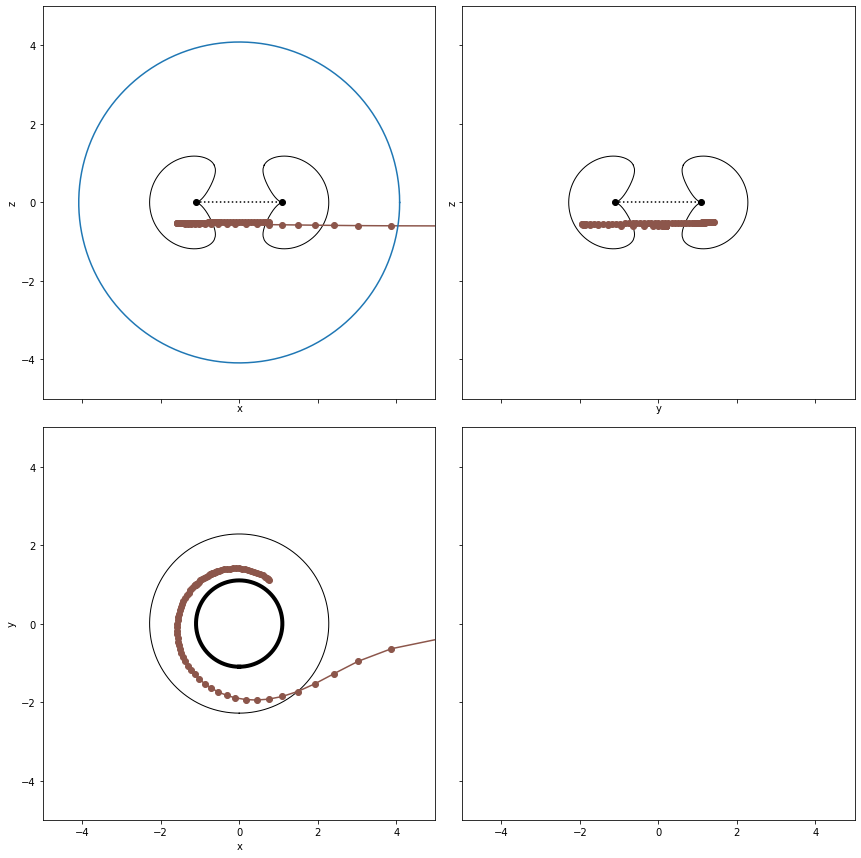

In [57]:
plot_fix_y(25, 23, 24, fx[-100:], fy[-100:], fz[-100:], 5, 1.1, True)

kk dies down as the photon begins to exit the naked singularity, but kk is still relatively high:

In [66]:
a = 1.1
xx = f[:,0,:,25,25][-500:-100] 
pp = f[:,1,:,25,25][-500:-100]
metric = CartesianKS()
metric_jax = jax.vmap(metric)
metric_array = metric_jax(xx)
kk = pp[:] @ metric_array[:,:] @ pp[:].T

for i in range(400):
  print(kk[i, i, i])

1.068766525041261
1.0718939667388458
1.0768113819921563
1.0844245613838597
1.0979025881191915
1.1167347433325434
1.1371866660682817
1.158794045547597
1.181527571156112
1.2051491904109057
1.2296985840405341
1.2549848624939126
1.281048419643033
1.3077591299758509
1.3351142174725834
1.3628969205693298
1.3912193815432756
1.4196773204427253
1.448215583520334
1.476384509805793
1.5040364677180857
1.5303546421309044
1.5551498274066606
1.5775815021572865
1.596674736617068
1.6130469618893426
1.6251519496474032
1.6328611762845646
1.635554522699115
1.6389495722919185
1.6436064612035046
1.6541711468973173
1.6708792226930778
1.6989624489149784
1.7451435848875374
1.7925594542183294
1.8405560071555769
1.8880325249781167
1.9338175727433535
1.976132262072288
2.0148690232315425
2.0493645953417037
2.077114840444978
2.0993271888863143
2.1154445228135645
2.12003109088971
2.1256189863042887
2.1318197487767203
2.141660292080245
2.158142910129597
2.1894936362091317
2.2313180829827846
2.2743689008097956
2.31789

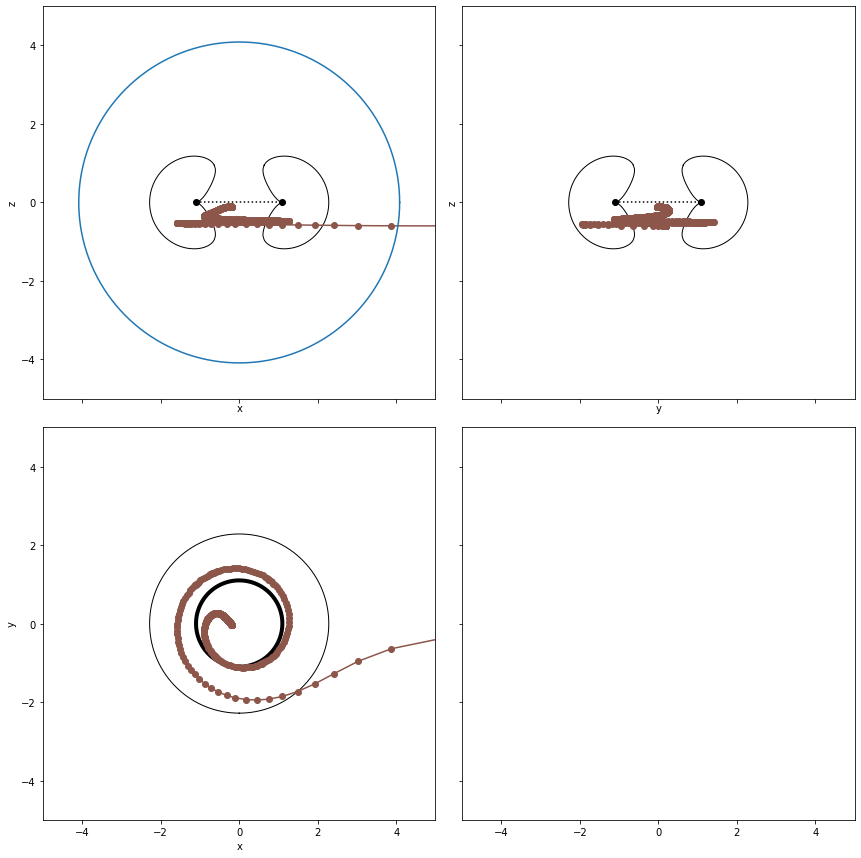

In [64]:
plot_fix_y(25, 23, 24, fx[-500:], fy[-500:], fz[-500:], 5, 1.1, True)

Next, let's look at one of the suspicious loop close to the ergosphere.

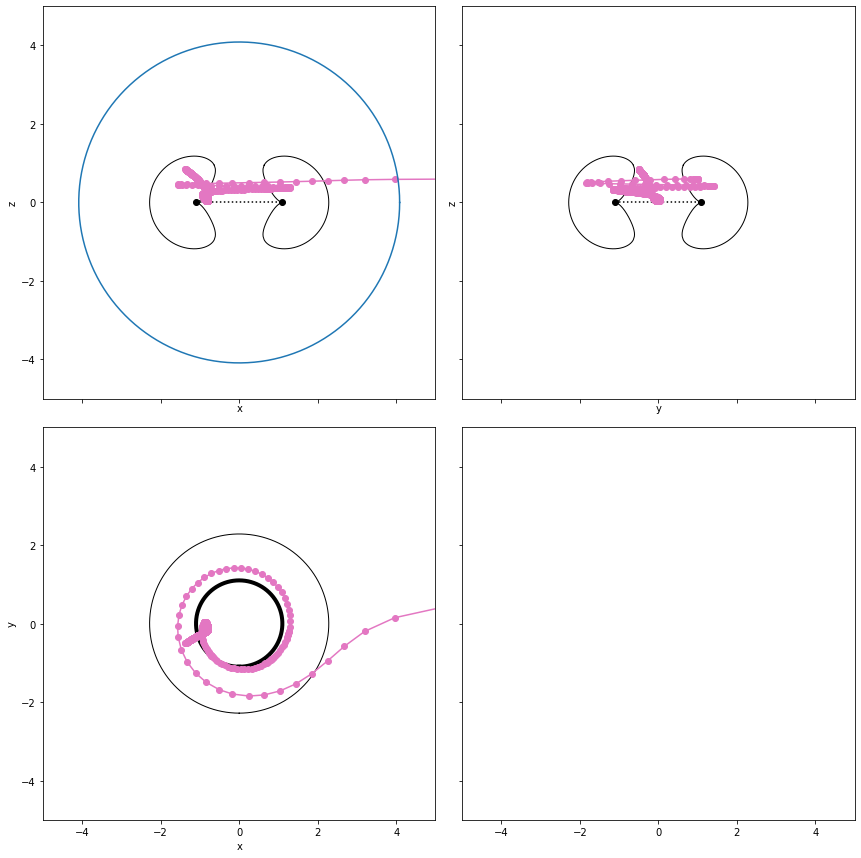

In [95]:
plot_fix_y(27, 26, 27, fx[-500:], fy[-500:], fz[-500:], 5, 1.1, True)

kk grows significantly within the 150 affine parameter steps as the photon enters the naked singularity as expected from earlier observations. Interestingly however, kk decays to nearly 0 when the photon is making the loop near the ergosphere as it is about to exit the singularity.

In [96]:
a = 1.1
xx = f[:,0,:,27,26][-400:] 
pp = f[:,1,:,27,26][-400:]
metric = CartesianKS()
metric_jax = jax.vmap(metric)
metric_array = metric_jax(xx)
kk = pp[:] @ metric_array[:,:] @ pp[:].T

for i in range(300):
  print(kk[i, i, i])

-0.5970870151990196
-0.6005436575596558
-0.6041174707445143
-0.6078223663863511
-0.6115694829598474
-0.6154048129471369
-0.6192141719112274
-0.6230618193639533
-0.6268296414487633
-0.6305650486435023
-0.6341351988193303
-0.6375723330091865
-0.6406157759588181
-0.6431191239636496
-0.645216500132766
-0.646985982232492
-0.648486608135967
-0.6498085125331323
-0.6513568155849225
-0.6531171438968195
-0.6552885589890387
-0.6586300601124784
-0.6638991840764839
-0.6692974129552329
-0.6748226053155111
-0.6804313667991571
-0.6860334670008752
-0.6914951615582734
-0.6967007142322703
-0.7016504681342024
-0.7062466880925684
-0.7105360304551298
-0.71434200647373
-0.7178812273592043
-0.7206541207304757
-0.7232305041323319
-0.7250215730703367
-0.7255214723526886
-0.7260563738967505
-0.7269520996911585
-0.7286729060018746
-0.7315496813452425
-0.7345203242589715
-0.7373757607094444
-0.7401292276340754
-0.7426157570186236
-0.7448606900162433
-0.7468110302602009
-0.7483812996115402
-0.7496626785242668
-0.75

## CONSTRUCTION SITE BELOW (please ignore):

In [ ]:
size1 = np.size(f[0,0,0,:,0])
size2 = np.size(f[0,0,0,0,:]) 
size3 = np.size(f[:,0,:,0,0])

size1 = 1
size2 = 1

for i, j in product([29, 30], [25, 26]):
  theta_ = theta[i, j]
  if np.isnan(theta_):
      k = -1
      while np.isnan(fx[:, i,j][k]) == False:
        k -= 1
        print(fx[:, i,j][k])
      
      xx = f[:,0,:,i,j][-k+1:] 
      pp = f[:,1,:,i,j][-k+1:]
      metric = CartesianKS()
      metric_jax = jax.vmap(metric)
      metric_array = metric_jax(xx)
      kk = pp[:] @ metric_array[:,:] @ pp[:].T



In [74]:
np.isnan(fx[:,0,0][-1]) == False

DeviceArray(True, dtype=bool)

In [56]:
a = 1.1
xx = f[:,0,:,25,25][-98] 
pp = f[:,1,:,25,25][-98]
metric = CartesianKS()
metric_array = metric(xx)
kk = pp[:] @ metric_array[:,:] @ pp[:]
kk

DeviceArray(1891.82973609, dtype=float64)

In [60]:
xx = f[:,0,:,30,25][-150:] 
pp = f[:,1,:,30,25][-150:]
metric = CartesianKS()
metric_jax = jax.vmap(metric)
metric_array = metric_jax(xx)
kk = pp[:] @ metric_array[:,:] @ pp[:].T
kk[3][3][3]

DeviceArray(nan, dtype=float64)

In [63]:
fx[:,30, 25][-150]

DeviceArray(nan, dtype=float32)

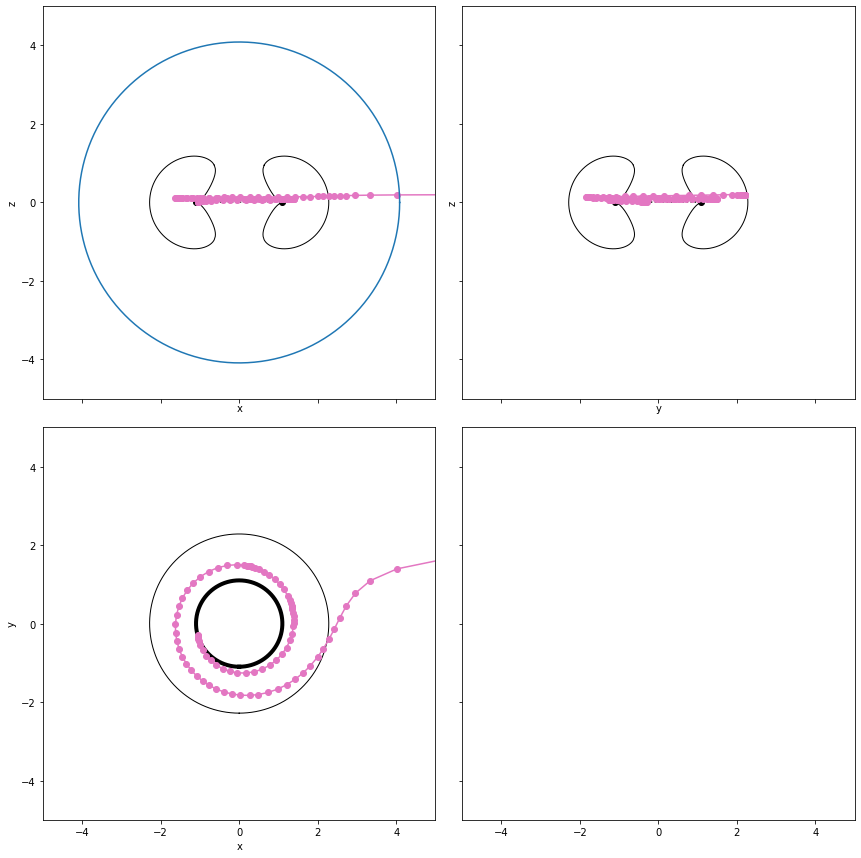

In [47]:
plot_fix_y(30, 25, 26, fx[-5000:], fy[-5000:], fz[-5000:], 5, 1.1, True)

In [82]:
# Vector transformation from Cartesian KS to Spherical KS
def Cartesian_to_Spherical(xx, a): # input Cartesian KS vector
  x = xx[1]
  y = xx[2]
  z = xx[3]

  R = (x**2 + y**2 + z**2)**(1/2)
  r = ((1/2)*( R**2 - a**2 + ((R**2 - a**2)**2 + 4*a**2*z**2)**(1/2) ))**(1/2)
  theta = np.arccos(z/r)
  phi = np.arctan( (x*a + y*r)/(x*r - y*a) )

  x_spherical = np.array([xx[0], r, theta, phi])

  return x_spherical # output Spherical KS vector

def KS_to_BL(x, a):
  t_KS = x[0]
  r = x[1]
  theta = x[2]
  phi_KS = x[3]

  delta = r**2 - 2*r + a**2
  p2 = r*2 + a**2 * (np.cos(theta))**2

  t_BL = t_KS - ( (2)/(np.sqrt(a**2 - 1)) * np.arctan((r-1)/(np.sqrt(a**2 - 1) ) ) +  np.log(delta))
  phi_BL = phi_KS -  (1)/(np.sqrt(a**2 - 1)) * np.arctan((r-1)/(np.sqrt(a**2 - 1) ) )

  x_BL = np.array([t_BL, x[1], x[2], phi_BL])

  return x_BL

In [79]:
# Spherical KS metric
def SphericalKS(a): 

    def metric(xx): # input Spherical KS position vector
      r = xx[1]
      theta = xx[2]
      phi = xx[3]

      f = (2*r)/(r**2 + a**2 * (np.cos(theta))**2)
      g_0 = np.array([[-1,        1,              0,                            0], 
                  [1,         0,              0,                 a*(np.sin(theta))**2],
                  [0,         0, r**2 + a**2*(np.cos(theta))**2,            0],
                  [0, a*(np.sin(theta))**2,   0,          (r**2 + a**2)*(np.sin(theta))**2]])
      l  = np.array([1, 0, 0, a * (np.sin(theta))**2])

      return g_0 + f * l[:,np.newaxis] * l[np.newaxis,:]

    return metric # output Spherical KS metric

In [80]:
def constant(x, p, metric):
  g_t = metric[0]
  g_theta = metric[2]
  g_phi = metric[3]
  theta = x[2]

  # p_u = g_uv p^v
  p_t = np.dot(g_t, p)
  p_theta = np.dot(g_theta, p)
  p_phi = np.dot(g_phi, p)


  E = p_t # energy
  Lz = -p_phi # angular momentum
  C = (p_theta)**2 + (np.cos(theta))**2 + (a**2 * (1 - E**2) + (Lz/np.sin(theta))**2 ) # Carter's constant

  return (E, Lz, C)

In [46]:
x = np.array([1,1,1,1])
CartesianKS(1.1)(x)

DeviceArray([[0.07247961, 0.79783319, 0.1281244 , 0.70516584],
             [0.79783319, 1.59351972, 0.0953136 , 0.52458313],
             [0.1281244 , 0.0953136 , 1.01530646, 0.08424305],
             [0.70516584, 0.52458313, 0.08424305, 1.46365344]],            dtype=float64)

In [73]:
x_spherical = Cartesian_to_Spherical(x, 1.1)

In [74]:
x_spherical

DeviceArray([1.        , 1.52088991, 0.85328745, 1.4115654 ], dtype=float64)

In [98]:
spherical_metric = SphericalKS(1.1)
metric = spherical_metric(x_spherical)

Coordinate transformation from Cartesian KS (t, x, y, z) to Spherical KS (t, r, theta, phi):

In [99]:
(E, Lz, C) = constant(x, x, metric)

In [119]:
len(f[0,0,0,:,0])

40

In [109]:
size1 = np.size(f[0,0,0,:,0])
size2 = np.size(f[0,0,0,0,:])             

for i, j in product(range(size1), range(size2)):
  for k in range()

IndexError: ignored

In [92]:
a = 1.1
size3 = np.size(f[:,0,:,0,0])
x = Cartesian_to_Spherical(f[:,0,:,0,0][0], 1.1)
p = Cartesian_to_Spherical(f[:,1,:,0,0][0], 1.1)
metric = spherical_metric(x)
(E, Lz, C) = constant(x, p, metric)
print(E, Lz, C)

x = Cartesian_to_Spherical(f[:,0,:,0,0][-100], 1.1)
p = Cartesian_to_Spherical(f[:,1,:,0,0][-100], 1.1)
metric = spherical_metric(x)
(E, Lz, C) = constant(x, p, metric)
print(E, Lz, C)

-0.52670777 -3302.1382 66494380.0
-0.6361697 -106.467804 128218.53


In [88]:
x = Cartesian_to_Spherical(f[:,0,:,20,20][0], 1.1)
p = Cartesian_to_Spherical(f[:,1,:,20,20][0], 1.1)
metric = SphericalKS(x)
(E, Lz, C) = constant(x, p, metric)
print("Conserved quantities at final time: ", E, Lz, C)

x = Cartesian_to_Spherical(f[:,0,:,20,20][-100], 1.1)
p = Cartesian_to_Spherical(f[:,1,:,20,20][-100], 1.1)
metric = SphericalKS(x)
(E, Lz, C) = constant(x, p, metric)
print("Conserved quantities at start time in Spherical KS: ", E, Lz, C)

TypeError: ignored

In [84]:
x = Cartesian_to_Spherical(f[:,0,:,4,4][-100], 1.1)
p = Cartesian_to_Spherical(f[:,1,:,4,4][-100], 1.1)

spherical_metric = SphericalKS(1.1)
metric = spherical_metric(x)
p[:] @ metric[:,:] @ p[:]

DeviceArray(499.27234, dtype=float32)

In [70]:
pp = f[:,1,:,22,20][29941]
xx = f[:,0,:,22,20][29941]
metric = CartesianKS()
metric2 = metric(xx)
pp[:] @ metric2[:,:] @ pp[:]

DeviceArray(-5.44374419e-08, dtype=float64)

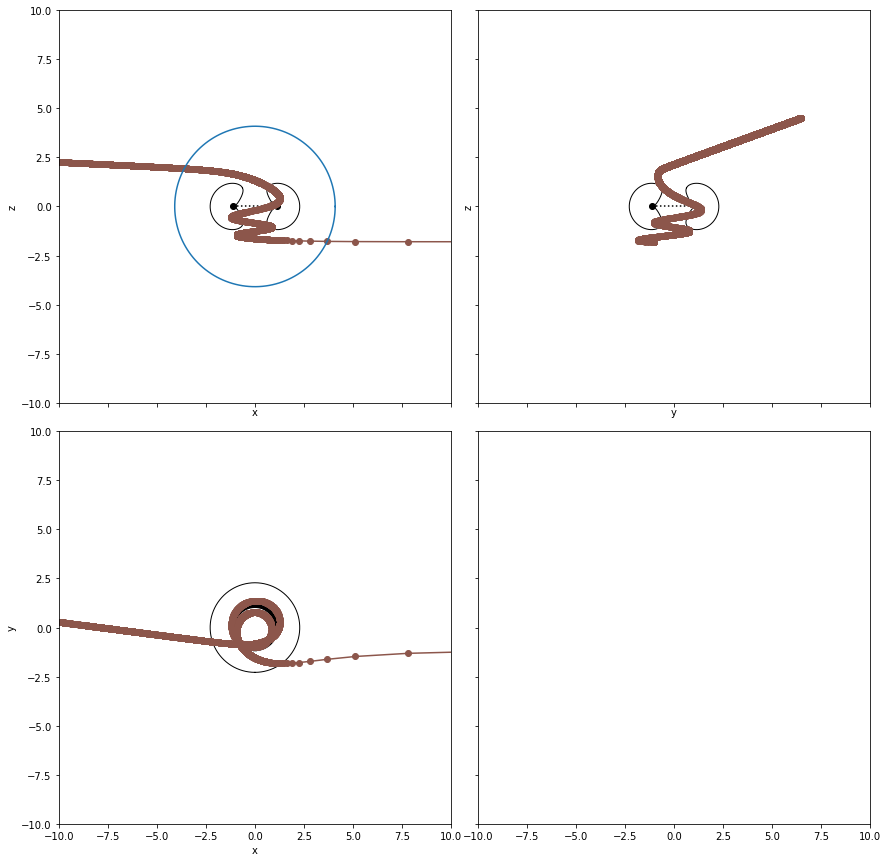

In [86]:
x = f[:,0,1,:,:][0:29940]
y = f[:,0,2,:,:][0:29940]
z = f[:,0,3,:,:][0:29940]
plot_fix_y(22, 20, 21, x, y, z, 10, 1.1, True)